In [2]:
#import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/cb4102/PUIdata


In [35]:
#check that the data is in the right place
!ls $PUIDATA

Traffic_Volume_Counts__2011-2012_.csv


In [3]:
#import the dataset from Open NYC Data
#I'm using the Traffic Volume (2011-2012) dataset, which I have downloaded and stored in my directory
#data can be found at https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2011-2012-/wng2-85mv

#traffic_counts = pd.read_csv('Traffic_Volume_Counts__2011-2012_.csv')
traffic_counts = pd.read_csv("%s/Traffic_Volume_Counts__2011-2012_.csv"%os.getenv("PUIDATA"))

In [7]:
print(os.getenv("PUIDATA")+"/"+"Traffic_Volume_Counts__2011-2012_.csv")

/nfshome/cb4102/PUIdata/Traffic_Volume_Counts__2011-2012_.csv


In [8]:
#print the first seven rows of the data set
traffic_counts.head(7)

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0
5,6,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/14/2012,42,27,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,SB,01/09/2012,27,12,12,...,165.0,197.0,152.0,174.0,128.0,95.0,87.0,73.0,57.0,42.0


In [9]:
#reduce data frame to two numeric columns
traffic_counts_redacted = traffic_counts[['ID','2:00-3:00PM','3:00-4:00PM']] #I kept the ID plus two numeric columns

In [10]:
traffic_counts_redacted.head(7)

,ID,2:00-3:00PM,3:00-4:00PM
0,1,104.0,105.0
1,2,102.0,98.0
2,3,115.0,115.0
3,4,71.0,127.0
4,5,113.0,126.0
5,6,NaN,NaN
6,7,165.0,197.0


Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0d4d9d30>], dtype=object)

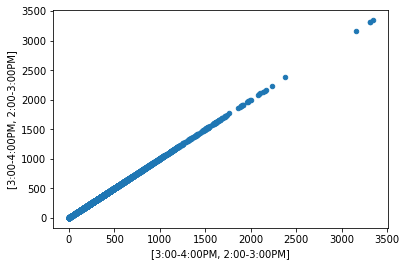

In [12]:
%pylab inline
traffic_counts_redacted.plot(x="3:00-4:00PM", y="2:00-3:00PM",kind="scatter", subplots=True)

traffic_counts_redacted.plot(x=, y=,kind="scatter, line, hist, box, pie, line, bar",logx=,logy=,loglog='if true will log both',xlim=(min,max),ylim=(min,max))

# Figure 1: 

## Number of traffic counts by intersection, comparing counts that occur between 2:00-3:00PM (x-axis) and 3:00-4:00PM (y-axis). The relationship between traffic counts at different times indicates that traffic volumes at a given intersection are similar between the hours of 2-3 and 3-4, suggesting busy intersections will be busy at both times

In [13]:
#Extra credit assignment, pulling the same data using the API
url = 'https://data.cityofnewyork.us/resource/hgck-kgcn.json'
traffic_count_api = pd.read_json(url)

In [49]:
traffic_count_api.head(7) #print the first seven rows of the dataframe

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,gis_id,id,roadway_name,to
0,68,42.0,42.0,85,20,85.0,10,94.0,11,104.0,...,74.0,52,49.0,2012-01-09,NB,UNION PLACE,15540,1,BEACH STREET,VAN DUZER STREET
1,57,42.0,35.0,67,21,73.0,16,95.0,8,102.0,...,70.0,45,63.0,2012-01-10,NB,UNION PLACE,15540,2,BEACH STREET,VAN DUZER STREET
2,67,56.0,43.0,70,27,90.0,14,89.0,6,115.0,...,68.0,71,64.0,2012-01-11,NB,UNION PLACE,15540,3,BEACH STREET,VAN DUZER STREET
3,70,64.0,43.0,60,22,105.0,7,103.0,7,71.0,...,64.0,66,58.0,2012-01-12,NB,UNION PLACE,15540,4,BEACH STREET,VAN DUZER STREET
4,83,55.0,54.0,89,31,88.0,17,113.0,7,113.0,...,58.0,64,58.0,2012-01-13,NB,UNION PLACE,15540,5,BEACH STREET,VAN DUZER STREET
5,29,NaN,NaN,0,42,NaN,27,NaN,21,NaN,...,NaN,53,NaN,2012-01-14,NB,UNION PLACE,15540,6,BEACH STREET,VAN DUZER STREET
6,105,57.0,42.0,124,27,140.0,12,120.0,12,165.0,...,87.0,138,73.0,2012-01-09,SB,UNION PLACE,15540,7,BEACH STREET,VAN DUZER STREET


In [52]:
traffic_counts_redacted_api = traffic_count_api[['id','date','_2_00_3_00pm','_3_00_4_00pm']] #reducing to two numeric columns plus the date field

In [53]:
traffic_counts_redacted_api.head(7)

,id,date,_2_00_3_00pm,_3_00_4_00pm
0,1,2012-01-09,104.0,105.0
1,2,2012-01-10,102.0,98.0
2,3,2012-01-11,115.0,115.0
3,4,2012-01-12,71.0,127.0
4,5,2012-01-13,113.0,126.0
5,6,2012-01-14,NaN,NaN
6,7,2012-01-09,165.0,197.0


Populating the interactive namespace from numpy and matplotlib


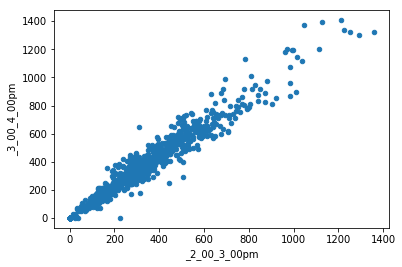

In [55]:
%pylab inline
traffic_counts_redacted_api.plot(x='_2_00_3_00pm', y='_3_00_4_00pm',kind="scatter")

# Figure 2:
## Number of traffic counts by intersection, comparing counts that occur between 2:00-3:00PM (x-axis) and 3:00-4:00PM (y-axis). The relationship between traffic counts at different times indicates that traffic volumes at a given intersection are similar between the hours of 2-3 and 3-4, suggesting busy intersections will be busy at both times¶

Text(0,0.5,'Number')

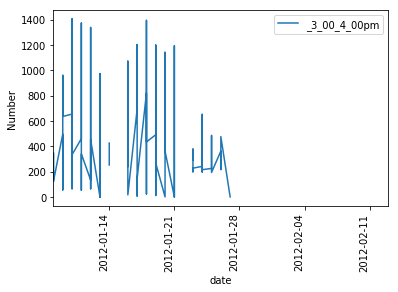

In [64]:
traffic_plot = traffic_counts_redacted_api.plot(x='date', y='_3_00_4_00pm',kind="line", rot=90)
traffic_plot.set_ylabel("Number")

# Figure 3:
## Shows the number of observations collected on each date between 3-4PM. 